In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import cross_val_predict

pd.set_option('display.max_columns', None)

In [2]:
file_path = r"C:/5. felev/DataScience/3.hazi/ingatlan.csv" 
df = pd.read_csv(file_path)

df.head(10)

,county,city,postcode,property_type,property_subtype,property_condition_type,property_floor,building_floor_count,view_type,orientation,garden_access,heating_type,elevator_type,room_cnt,small_room_cnt,created_at,property_area,balcony_area,price_created_at,ad_view_cnt,active_days,nr,district
0,Budapest,Budapest IV.,NaN,flat,prefabricated panel flat (for sale),good,3,10,garden view,east,NaN,NaN,yes,1.0,1.0,2015-02-09,35.0,0.0,9.5,702.0,23.0,7,4.0
1,Budapest,Budapest XIV.,1147.0,flat,brick flat (for sale),novel,ground floor,NaN,NaN,NaN,NaN,"gas furnace, circulating hot water",NaN,1.0,0.0,2015-02-09,35.0,0.0,11.2,42.0,6.0,8,14.0
2,Budapest,Budapest XIV.,NaN,flat,brick flat (for sale),medium,4,NaN,NaN,NaN,NaN,konvection gas burner,NaN,2.0,0.0,2015-02-09,50.0,0.0,14.5,504.0,96.0,9,14.0
3,Budapest,Budapest II.,1024.0,flat,brick flat (for sale),novel,basement,NaN,street view,NaN,NaN,konvection gas burner,yes,1.0,1.0,2015-02-09,50.0,0.0,15.3,39.0,1.0,11,2.0
4,Budapest,Budapest XII.,1126.0,flat,brick flat (for sale),good,ground floor,NaN,garden view,NaN,NaN,"gas furnace, circulating hot water",none,1.0,2.0,2015-02-09,50.0,0.0,17.9,114.0,27.0,13,12.0
5,Budapest,Budapest XVII.,NaN,flat,brick flat (for sale),novel,ground floor,NaN,garden view,NaN,NaN,"gas furnace, circulating hot water",none,2.0,0.0,2015-02-09,60.0,0.0,21.5,41.0,27.0,15,17.0
6,Budapest,Budapest XIII.,1134.0,flat,NaN,good,7,NaN,garden view,west,none,district heating,yes,1.0,1.0,2015-02-09,40.0,0.0,10.8,684.0,43.0,17,13.0
7,Budapest,Budapest XIV.,NaN,flat,brick flat (for sale),good,4,4,street view,south-east,none,konvection gas burner,none,2.0,0.0,2015-02-09,50.0,4.0,14.5,710.0,82.0,18,14.0
8,Budapest,Budapest X.,1102.0,flat,brick flat (for sale),medium,2,NaN,street view,NaN,NaN,central heating with own meter,yes,1.0,1.0,2015-02-09,60.0,0.0,11.5,316.0,119.0,19,10.0
9,Budapest,Budapest X.,1105.0,flat,brick flat (for sale),medium,3,NaN,garden view,NaN,NaN,district heating,none,2.0,1.0,2015-02-09,60.0,0.0,10.6,691.0,62.0,20,10.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183565 entries, 0 to 183564
Data columns (total 23 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   county                   183565 non-null  object 
 1   city                     182261 non-null  object 
 2   postcode                 115475 non-null  float64
 3   property_type            183565 non-null  object 
 4   property_subtype         179925 non-null  object 
 5   property_condition_type  183565 non-null  object 
 6   property_floor           174499 non-null  object 
 7   building_floor_count     85776 non-null   object 
 8   view_type                100462 non-null  object 
 9   orientation              111423 non-null  object 
 10  garden_access            40679 non-null   object 
 11  heating_type             156879 non-null  object 
 12  elevator_type            150063 non-null  object 
 13  room_cnt                 183565 non-null  float64
 14  smal

In [4]:
df.describe()

,postcode,room_cnt,small_room_cnt,property_area,balcony_area,price_created_at,ad_view_cnt,active_days,nr,district
count,115475.000000,183565.000000,182981.000000,183565.000000,175966.000000,183565.000000,183564.000000,183565.000000,183565.000000,176009.000000
mean,1103.395895,1.476393,0.547177,48.443984,7.748792,20.564001,262.264082,44.071593,196659.747942,9.730434
std,50.789818,0.972892,0.748810,12.776044,2360.665258,171.496565,556.838684,47.969011,113179.241269,4.782807
min,1011.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,7.000000,1.000000
25%,1063.000000,1.000000,0.000000,40.000000,0.000000,13.200000,41.000000,11.000000,98117.000000,6.000000
50%,1101.000000,1.000000,0.000000,50.000000,0.000000,16.900000,102.000000,28.000000,196774.000000,10.000000
75%,1141.000000,2.000000,1.000000,60.000000,3.000000,23.900000,265.000000,60.000000,294824.000000,13.000000
max,1239.000000,215.000000,56.000000,70.000000,990257.000000,41796.000000,40248.000000,544.000000,394178.000000,20.000000


In [5]:
df.shape

(183565, 23)

In [6]:
df['property_type'].isnull().sum()

np.int64(0)

In [7]:
df['m2_price'] = (df['price_created_at'] / df['property_area']) * 1e6
df['m2_price'].describe()


c:\Users\afodor\sajat_interpreter\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


count    1.835650e+05
mean              inf
std               NaN
min      0.000000e+00
25%      2.880000e+05
50%      3.760000e+05
75%      4.923077e+05
max               inf
Name: m2_price, dtype: float64

In [8]:
df.shape

(183565, 24)

In [9]:
df.head()

,county,city,postcode,property_type,property_subtype,property_condition_type,property_floor,building_floor_count,view_type,orientation,garden_access,heating_type,elevator_type,room_cnt,small_room_cnt,created_at,property_area,balcony_area,price_created_at,ad_view_cnt,active_days,nr,district,m2_price
0,Budapest,Budapest IV.,NaN,flat,prefabricated panel flat (for sale),good,3,10,garden view,east,NaN,NaN,yes,1.0,1.0,2015-02-09,35.0,0.0,9.5,702.0,23.0,7,4.0,271428.571429
1,Budapest,Budapest XIV.,1147.0,flat,brick flat (for sale),novel,ground floor,NaN,NaN,NaN,NaN,"gas furnace, circulating hot water",NaN,1.0,0.0,2015-02-09,35.0,0.0,11.2,42.0,6.0,8,14.0,320000.000000
2,Budapest,Budapest XIV.,NaN,flat,brick flat (for sale),medium,4,NaN,NaN,NaN,NaN,konvection gas burner,NaN,2.0,0.0,2015-02-09,50.0,0.0,14.5,504.0,96.0,9,14.0,290000.000000
3,Budapest,Budapest II.,1024.0,flat,brick flat (for sale),novel,basement,NaN,street view,NaN,NaN,konvection gas burner,yes,1.0,1.0,2015-02-09,50.0,0.0,15.3,39.0,1.0,11,2.0,306000.000000
4,Budapest,Budapest XII.,1126.0,flat,brick flat (for sale),good,ground floor,NaN,garden view,NaN,NaN,"gas furnace, circulating hot water",none,1.0,2.0,2015-02-09,50.0,0.0,17.9,114.0,27.0,13,12.0,358000.000000


In [10]:
df = df.drop(['county', 'ad_view_cnt', 'active_days', 'nr', 'district', 'price_created_at'], axis=1)
df.head()

,city,postcode,property_type,property_subtype,property_condition_type,property_floor,building_floor_count,view_type,orientation,garden_access,heating_type,elevator_type,room_cnt,small_room_cnt,created_at,property_area,balcony_area,m2_price
0,Budapest IV.,NaN,flat,prefabricated panel flat (for sale),good,3,10,garden view,east,NaN,NaN,yes,1.0,1.0,2015-02-09,35.0,0.0,271428.571429
1,Budapest XIV.,1147.0,flat,brick flat (for sale),novel,ground floor,NaN,NaN,NaN,NaN,"gas furnace, circulating hot water",NaN,1.0,0.0,2015-02-09,35.0,0.0,320000.000000
2,Budapest XIV.,NaN,flat,brick flat (for sale),medium,4,NaN,NaN,NaN,NaN,konvection gas burner,NaN,2.0,0.0,2015-02-09,50.0,0.0,290000.000000
3,Budapest II.,1024.0,flat,brick flat (for sale),novel,basement,NaN,street view,NaN,NaN,konvection gas burner,yes,1.0,1.0,2015-02-09,50.0,0.0,306000.000000
4,Budapest XII.,1126.0,flat,brick flat (for sale),good,ground floor,NaN,garden view,NaN,NaN,"gas furnace, circulating hot water",none,1.0,2.0,2015-02-09,50.0,0.0,358000.000000


In [11]:
df = df.loc[df['property_area']>0, :].reset_index(drop=True)
df = df.loc[df['m2_price']>0, :].reset_index(drop=True)
df['m2_price'].describe()

count    1.834490e+05
mean     4.346854e+05
std      3.931615e+06
min      1.428571e+03
25%      2.876923e+05
50%      3.755556e+05
75%      4.916667e+05
max      7.954114e+08
Name: m2_price, dtype: float64

<Axes: >

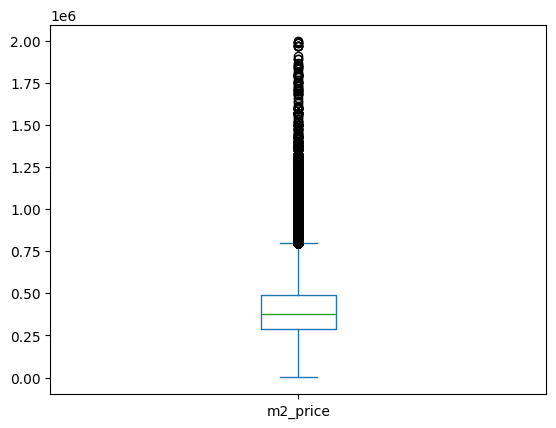

In [12]:
df.loc[df['m2_price']<2e6, 'm2_price'].plot(kind='box')

In [13]:
df['pred_baseline'] = df['m2_price'].mean()
mean_absolute_percentage_error(df['m2_price'], df['pred_baseline'])

np.float64(0.3871963174433122)

In [14]:
from sklearn.ensemble import GradientBoostingRegressor


model1 = LinearRegression()

model2 = GradientBoostingRegressor(random_state=42)
model1, model2

(LinearRegression(), GradientBoostingRegressor(random_state=42))

In [15]:
y_col = 'm2_price'
X_cols = ['room_cnt']

X = df.loc[:, X_cols]
y = df.loc[:, y_col]

pred_linreg = cross_val_predict(model1, X, y, cv=6)
pred_gbm= cross_val_predict(model2, X, y, cv=6)


In [16]:
mean_absolute_percentage_error(y, pred_linreg)


np.float64(0.4098979440580872)

In [17]:
mean_absolute_percentage_error(y, pred_gbm)

np.float64(0.395266801730675)

In [18]:
df.head()

,city,postcode,property_type,property_subtype,property_condition_type,property_floor,building_floor_count,view_type,orientation,garden_access,heating_type,elevator_type,room_cnt,small_room_cnt,created_at,property_area,balcony_area,m2_price,pred_baseline
0,Budapest IV.,NaN,flat,prefabricated panel flat (for sale),good,3,10,garden view,east,NaN,NaN,yes,1.0,1.0,2015-02-09,35.0,0.0,271428.571429,434685.39425
1,Budapest XIV.,1147.0,flat,brick flat (for sale),novel,ground floor,NaN,NaN,NaN,NaN,"gas furnace, circulating hot water",NaN,1.0,0.0,2015-02-09,35.0,0.0,320000.000000,434685.39425
2,Budapest XIV.,NaN,flat,brick flat (for sale),medium,4,NaN,NaN,NaN,NaN,konvection gas burner,NaN,2.0,0.0,2015-02-09,50.0,0.0,290000.000000,434685.39425
3,Budapest II.,1024.0,flat,brick flat (for sale),novel,basement,NaN,street view,NaN,NaN,konvection gas burner,yes,1.0,1.0,2015-02-09,50.0,0.0,306000.000000,434685.39425
4,Budapest XII.,1126.0,flat,brick flat (for sale),good,ground floor,NaN,garden view,NaN,NaN,"gas furnace, circulating hot water",none,1.0,2.0,2015-02-09,50.0,0.0,358000.000000,434685.39425


In [19]:
df['pred_linreg'] = pred_linreg

df['ape_linreg'] = abs(df['m2_price'] - df['pred_linreg'])  / df['m2_price']

df['ape_linreg'].describe()

count    183449.000000
mean          0.409898
std           1.166709
min           0.000003
25%           0.137054
50%           0.296098
75%           0.545423
max         336.273762
Name: ape_linreg, dtype: float64

In [20]:
df['pred_gbm'] = pred_gbm

df['ape_gbm'] = abs(df['m2_price'] - df['pred_gbm'])  / df['m2_price']

df['ape_gbm'].describe()

count    183449.000000
mean          0.395267
std           1.366457
min           0.000054
25%           0.137664
50%           0.292856
75%           0.534985
max         328.823269
Name: ape_gbm, dtype: float64

<Axes: >

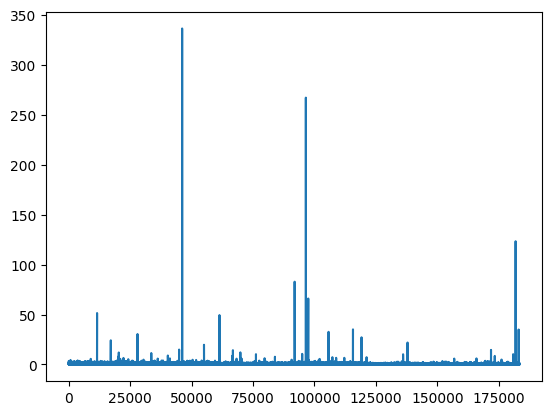

In [21]:
df['ape_linreg'].plot()


<Axes: >

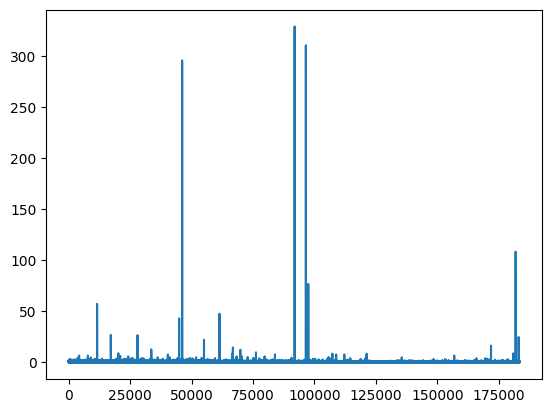

In [22]:
df['ape_gbm'].plot()

In [23]:
low_m2_price = df['m2_price']<1e5
high_m2_price = df['m2_price']>2e6

In [24]:
df.loc[~low_m2_price & ~high_m2_price, 'ape_linreg'].describe()

count    183277.000000
mean          0.402356
std           0.437700
min           0.000003
25%           0.136608
50%           0.295705
75%           0.544294
max          82.842099
Name: ape_linreg, dtype: float64

In [25]:
df.loc[~low_m2_price & ~high_m2_price, 'ape_gbm'].describe()

count    183277.000000
mean          0.387773
std           0.846210
min           0.000054
25%           0.137279
50%           0.292196
75%           0.534019
max         328.823269
Name: ape_gbm, dtype: float64

In [26]:
df = df.loc[~low_m2_price &
            ~high_m2_price,
      :].reset_index(drop=True)

df.shape

(183277, 23)

In [27]:
df.head(8)

,city,postcode,property_type,property_subtype,property_condition_type,property_floor,building_floor_count,view_type,orientation,garden_access,heating_type,elevator_type,room_cnt,small_room_cnt,created_at,property_area,balcony_area,m2_price,pred_baseline,pred_linreg,ape_linreg,pred_gbm,ape_gbm
0,Budapest IV.,NaN,flat,prefabricated panel flat (for sale),good,3,10,garden view,east,NaN,NaN,yes,1.0,1.0,2015-02-09,35.0,0.0,271428.571429,434685.39425,419794.093489,0.546610,466485.108919,0.718629
1,Budapest XIV.,1147.0,flat,brick flat (for sale),novel,ground floor,NaN,NaN,NaN,NaN,"gas furnace, circulating hot water",NaN,1.0,0.0,2015-02-09,35.0,0.0,320000.000000,434685.39425,419794.093489,0.311857,466485.108919,0.457766
2,Budapest XIV.,NaN,flat,brick flat (for sale),medium,4,NaN,NaN,NaN,NaN,konvection gas burner,NaN,2.0,0.0,2015-02-09,50.0,0.0,290000.000000,434685.39425,484173.222632,0.669563,426384.703449,0.470292
3,Budapest II.,1024.0,flat,brick flat (for sale),novel,basement,NaN,street view,NaN,NaN,konvection gas burner,yes,1.0,1.0,2015-02-09,50.0,0.0,306000.000000,434685.39425,419794.093489,0.371876,466485.108919,0.524461
4,Budapest XII.,1126.0,flat,brick flat (for sale),good,ground floor,NaN,garden view,NaN,NaN,"gas furnace, circulating hot water",none,1.0,2.0,2015-02-09,50.0,0.0,358000.000000,434685.39425,419794.093489,0.172609,466485.108919,0.303031
5,Budapest XVII.,NaN,flat,brick flat (for sale),novel,ground floor,NaN,garden view,NaN,NaN,"gas furnace, circulating hot water",none,2.0,0.0,2015-02-09,60.0,0.0,358333.333333,434685.39425,484173.222632,0.351181,426384.703449,0.189911
6,Budapest XIII.,1134.0,flat,NaN,good,7,NaN,garden view,west,none,district heating,yes,1.0,1.0,2015-02-09,40.0,0.0,270000.000000,434685.39425,419794.093489,0.554793,466485.108919,0.727723
7,Budapest XIV.,NaN,flat,brick flat (for sale),good,4,4,street view,south-east,none,konvection gas burner,none,2.0,0.0,2015-02-09,50.0,4.0,290000.000000,434685.39425,484173.222632,0.669563,426384.703449,0.470292


In [28]:

X = df.loc[:, X_cols]
y = df.loc[:, y_col]

pred_linreg = cross_val_predict(model1, X, y, cv=6)
pred_gbm= cross_val_predict(model2, X, y, cv=6)

In [29]:
mean_absolute_percentage_error(y, pred_linreg)

np.float64(0.3473091858414022)

In [30]:
mean_absolute_percentage_error(y, pred_gbm)

np.float64(0.34646048152115727)

In [31]:
df['pred_linreg'] = pred_linreg

df['ape_linreg'] = abs(df['m2_price'] - df['pred_linreg'])  / df['m2_price']

df['ape_linreg'].describe()

count    183277.000000
mean          0.347309
std           0.298054
min           0.000037
25%           0.132084
50%           0.275154
75%           0.475072
max           5.901628
Name: ape_linreg, dtype: float64

In [32]:

df['pred_gbm'] = pred_gbm

df['ape_gbm'] = abs(df['m2_price'] - df['pred_gbm'])  / df['m2_price']

df['ape_gbm'].describe()

count    183277.000000
mean          0.346460
std           0.297214
min           0.000164
25%           0.132309
50%           0.274039
75%           0.473705
max           5.823926
Name: ape_gbm, dtype: float64

In [33]:
X_cols += ['property_area', 'small_room_cnt']

In [34]:
df.loc[:, X_cols].isnull().sum()

room_cnt            0
property_area       0
small_room_cnt    582
dtype: int64

In [35]:
df['small_room_cnt'] = df['small_room_cnt'].fillna(0)

In [36]:
X = df.loc[:, X_cols]
y = df.loc[:, y_col]

pred_linreg = cross_val_predict(model1, X, y, cv=6)
pred_gbm= cross_val_predict(model2, X, y, cv=6)

In [37]:
mean_absolute_percentage_error(y, pred_linreg)

np.float64(0.33889415142183216)

In [38]:
mean_absolute_percentage_error(y, pred_gbm)

np.float64(0.32810455280057416)

In [39]:
df.loc[df['small_room_cnt']<0, 'small_room_cnt'] = 0
df['room'] = df['room_cnt'] + (df['small_room_cnt'] / 2)
df = df.loc[df['room']>0, :].reset_index(drop=True)
df['area_by_room'] = (df['property_area'] / df['room'])
df = df.loc[df['area_by_room']>=5, :].reset_index(drop=True)

In [40]:
X = df.loc[:, X_cols]
y = df.loc[:, y_col]

pred_linreg = cross_val_predict(model1, X, y, cv=6)
pred_gbm= cross_val_predict(model2, X, y, cv=6)

In [41]:
mean_absolute_percentage_error(y, pred_linreg)

np.float64(0.3387051314332475)

In [42]:
mean_absolute_percentage_error(y, pred_gbm)

np.float64(0.3280655001573074)

In [43]:
X_cols += ['balcony_area']
df['balcony_area'] = df['balcony_area'].fillna(0)
df = df.loc[df['balcony_area']<df['property_area'], :].reset_index(drop=True)

In [44]:
X = df.loc[:, X_cols]
y = df.loc[:, y_col]

pred_linreg = cross_val_predict(model1, X, y, cv=6)
pred_gbm= cross_val_predict(model2, X, y, cv=6)

In [45]:
mean_absolute_percentage_error(y, pred_linreg)

np.float64(0.3314140146210681)

In [46]:
mean_absolute_percentage_error(y, pred_gbm)

np.float64(0.3165551209233635)

In [47]:
df['pred_linreg'] = pred_linreg

df['ape_linreg'] = abs(df['m2_price'] - df['pred_linreg'])  / df['m2_price']

df['ape_linreg'].describe()


count    182869.000000
mean          0.331414
std           0.283423
min           0.000021
25%           0.129969
50%           0.263812
75%           0.450829
max           3.986983
Name: ape_linreg, dtype: float64

In [48]:
df['pred_gbm'] = pred_gbm

df['ape_gbm'] = abs(df['m2_price'] - df['pred_gbm'])  / df['m2_price']

df['ape_gbm'].describe()

count    182869.000000
mean          0.316555
std           0.282375
min           0.000001
25%           0.119592
50%           0.249602
75%           0.427231
max           6.330175
Name: ape_gbm, dtype: float64

In [49]:
city_dummies = pd.get_dummies(df['city'], prefix='city', drop_first=True)
df = pd.concat([df, city_dummies], axis=1)
X_cols += city_dummies.columns.tolist()

In [50]:
X = df.loc[:, X_cols]
y = df.loc[:, y_col]

pred_linreg = cross_val_predict(model1, X, y, cv=6)
pred_gbm= cross_val_predict(model2, X, y, cv=6)

In [51]:
mean_absolute_percentage_error(y, pred_linreg)

np.float64(0.22562415569145328)

In [52]:
mean_absolute_percentage_error(y, pred_gbm)

np.float64(0.23259667869395625)

In [53]:
df.head()

,city,postcode,property_type,property_subtype,property_condition_type,property_floor,building_floor_count,view_type,orientation,garden_access,heating_type,elevator_type,room_cnt,small_room_cnt,created_at,property_area,balcony_area,m2_price,pred_baseline,pred_linreg,ape_linreg,pred_gbm,ape_gbm,room,area_by_room,city_Budapest II.,city_Budapest III.,city_Budapest IV.,city_Budapest IX.,city_Budapest V.,city_Budapest VI.,city_Budapest VII.,city_Budapest VIII.,city_Budapest X.,city_Budapest XI.,city_Budapest XII.,city_Budapest XIII.,city_Budapest XIV.,city_Budapest XIX.,city_Budapest XV.,city_Budapest XVI.,city_Budapest XVII.,city_Budapest XVIII.,city_Budapest XX.,city_Budapest XXI.,city_Budapest XXII.,city_Budapest XXIII.
0,Budapest IV.,NaN,flat,prefabricated panel flat (for sale),good,3,10,garden view,east,NaN,NaN,yes,1.0,1.0,2015-02-09,35.0,0.0,271428.571429,434685.39425,427089.792649,0.573489,415935.974925,0.532396,1.5,23.333333,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,Budapest XIV.,1147.0,flat,brick flat (for sale),novel,ground floor,NaN,NaN,NaN,NaN,"gas furnace, circulating hot water",NaN,1.0,0.0,2015-02-09,35.0,0.0,320000.000000,434685.39425,451034.842243,0.409484,424104.916896,0.325328,1.0,35.000000,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
2,Budapest XIV.,NaN,flat,brick flat (for sale),medium,4,NaN,NaN,NaN,NaN,konvection gas burner,NaN,2.0,0.0,2015-02-09,50.0,0.0,290000.000000,434685.39425,412885.461511,0.423743,401899.583872,0.385861,2.0,25.000000,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
3,Budapest II.,1024.0,flat,brick flat (for sale),novel,basement,NaN,street view,NaN,NaN,konvection gas burner,yes,1.0,1.0,2015-02-09,50.0,0.0,306000.000000,434685.39425,395817.989785,0.293523,412411.551860,0.347750,1.5,33.333333,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,Budapest XII.,1126.0,flat,brick flat (for sale),good,ground floor,NaN,garden view,NaN,NaN,"gas furnace, circulating hot water",none,1.0,2.0,2015-02-09,50.0,0.0,358000.000000,434685.39425,371872.940191,0.038751,357880.419792,0.000334,2.0,25.000000,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False


In [54]:
df['property_floor'].value_counts(dropna=False)

property_floor
1                  33998
2                  29931
ground floor       28901
3                  24940
4                  15019
NaN                 8917
mezzanine floor     8697
5                   8108
6                   5794
7                   4398
8                   4034
10                  3943
9                   3908
10 plus             1218
basement            1063
Name: count, dtype: int64

In [55]:
floor_map = {
    'ground floor': 0,
    'mezzanine floor': 0.5,
    '10 plus': 11,
    'basement': -1
}

In [56]:
df.loc[df['property_floor'].isin(floor_map.keys()), 'property_floor'] =\
df.loc[df['property_floor'].isin(floor_map.keys()), 'property_floor'].map(floor_map)
df['property_floor'] = df['property_floor'].astype(float)
df['property_floor'] = df['property_floor'].fillna(df['property_floor'].mean())
X_cols += ['property_floor']

In [57]:
X = df.loc[:, X_cols]
y = df.loc[:, y_col]

pred_linreg = cross_val_predict(model1, X, y, cv=6)
pred_gbm= cross_val_predict(model2, X, y, cv=6)

In [58]:
mean_absolute_percentage_error(y, pred_linreg)

np.float64(0.22456837484877812)

In [59]:
mean_absolute_percentage_error(y, pred_gbm)

np.float64(0.22970539293714098)

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182869 entries, 0 to 182868
Data columns (total 47 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   city                     181568 non-null  object 
 1   postcode                 114995 non-null  float64
 2   property_type            182869 non-null  object 
 3   property_subtype         179238 non-null  object 
 4   property_condition_type  182869 non-null  object 
 5   property_floor           182869 non-null  float64
 6   building_floor_count     85396 non-null   object 
 7   view_type                100086 non-null  object 
 8   orientation              111072 non-null  object 
 9   garden_access            40463 non-null   object 
 10  heating_type             156357 non-null  object 
 11  elevator_type            149610 non-null  object 
 12  room_cnt                 182869 non-null  float64
 13  small_room_cnt           182869 non-null  float64
 14  crea

In [61]:
df['property_condition_type'].value_counts()

property_condition_type
good                  61713
novel                 36574
renewed               28543
medium                25756
to_be_renovated       14270
missing_info           8104
new_construction       6846
can_move_in            1034
under_construction       29
Name: count, dtype: int64

In [62]:
condition_dict = {
    'missing_info':0,
    'under_construction':1,
    'to_be_renovated':2,
    'can_move_in':3,
    'medium':4,
    'good':5,
    'renewed':6,
    'novel':7,
    'new_construction':8
}

In [63]:
df['property_condition_type'] = df['property_condition_type'].map(condition_dict)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182869 entries, 0 to 182868
Data columns (total 47 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   city                     181568 non-null  object 
 1   postcode                 114995 non-null  float64
 2   property_type            182869 non-null  object 
 3   property_subtype         179238 non-null  object 
 4   property_condition_type  182869 non-null  int64  
 5   property_floor           182869 non-null  float64
 6   building_floor_count     85396 non-null   object 
 7   view_type                100086 non-null  object 
 8   orientation              111072 non-null  object 
 9   garden_access            40463 non-null   object 
 10  heating_type             156357 non-null  object 
 11  elevator_type            149610 non-null  object 
 12  room_cnt                 182869 non-null  float64
 13  small_room_cnt           182869 non-null  float64
 14  crea

In [64]:
X_cols += ['property_condition_type']

In [65]:
df.head()

,city,postcode,property_type,property_subtype,property_condition_type,property_floor,building_floor_count,view_type,orientation,garden_access,heating_type,elevator_type,room_cnt,small_room_cnt,created_at,property_area,balcony_area,m2_price,pred_baseline,pred_linreg,ape_linreg,pred_gbm,ape_gbm,room,area_by_room,city_Budapest II.,city_Budapest III.,city_Budapest IV.,city_Budapest IX.,city_Budapest V.,city_Budapest VI.,city_Budapest VII.,city_Budapest VIII.,city_Budapest X.,city_Budapest XI.,city_Budapest XII.,city_Budapest XIII.,city_Budapest XIV.,city_Budapest XIX.,city_Budapest XV.,city_Budapest XVI.,city_Budapest XVII.,city_Budapest XVIII.,city_Budapest XX.,city_Budapest XXI.,city_Budapest XXII.,city_Budapest XXIII.
0,Budapest IV.,NaN,flat,prefabricated panel flat (for sale),5,3.0,10,garden view,east,NaN,NaN,yes,1.0,1.0,2015-02-09,35.0,0.0,271428.571429,434685.39425,427089.792649,0.573489,415935.974925,0.532396,1.5,23.333333,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,Budapest XIV.,1147.0,flat,brick flat (for sale),7,0.0,NaN,NaN,NaN,NaN,"gas furnace, circulating hot water",NaN,1.0,0.0,2015-02-09,35.0,0.0,320000.000000,434685.39425,451034.842243,0.409484,424104.916896,0.325328,1.0,35.000000,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
2,Budapest XIV.,NaN,flat,brick flat (for sale),4,4.0,NaN,NaN,NaN,NaN,konvection gas burner,NaN,2.0,0.0,2015-02-09,50.0,0.0,290000.000000,434685.39425,412885.461511,0.423743,401899.583872,0.385861,2.0,25.000000,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
3,Budapest II.,1024.0,flat,brick flat (for sale),7,-1.0,NaN,street view,NaN,NaN,konvection gas burner,yes,1.0,1.0,2015-02-09,50.0,0.0,306000.000000,434685.39425,395817.989785,0.293523,412411.551860,0.347750,1.5,33.333333,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,Budapest XII.,1126.0,flat,brick flat (for sale),5,0.0,NaN,garden view,NaN,NaN,"gas furnace, circulating hot water",none,1.0,2.0,2015-02-09,50.0,0.0,358000.000000,434685.39425,371872.940191,0.038751,357880.419792,0.000334,2.0,25.000000,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False


In [66]:
X = df.loc[:, X_cols]
y = df.loc[:, y_col]

pred_linreg = cross_val_predict(model1, X, y, cv=6)
pred_gbm= cross_val_predict(model2, X, y, cv=6)

In [67]:
mean_absolute_percentage_error(y, pred_linreg)

np.float64(0.21144226121215495)

In [68]:
mean_absolute_percentage_error(y, pred_gbm)

np.float64(0.20878147316288395)

In [69]:
df['pred_linreg'] = pred_linreg

df['ape_linreg'] = abs(df['m2_price'] - df['pred_linreg'])  / df['m2_price']

df['ape_linreg'].describe()


count    182869.000000
mean          0.211442
std           0.192405
min           0.000002
25%           0.077934
50%           0.164966
75%           0.289736
max           4.451876
Name: ape_linreg, dtype: float64

In [70]:
df['pred_gbm'] = pred_gbm

df['ape_gbm'] = abs(df['m2_price'] - df['pred_gbm'])  / df['m2_price']

df['ape_gbm'].describe()

count    182869.000000
mean          0.208781
std           0.191065
min           0.000004
25%           0.076458
50%           0.162499
75%           0.285810
max           5.192425
Name: ape_gbm, dtype: float64

In [71]:
from sklearn.model_selection import RandomizedSearchCV
gbm_params = {
    'n_estimators': [100, 200, 400],
    'learning_rate': [0.01, 0.1],
    'max_depth': [4, 5, 6],
}
model2 = GradientBoostingRegressor(random_state=42)
gbm_random = RandomizedSearchCV(
    model2,
    gbm_params,
    scoring='neg_mean_absolute_percentage_error',
    n_iter=8,
    cv=6,
    random_state=42,
    n_jobs=-1
)
gbm_random.fit(X, y)

best_gbm_model = gbm_random.best_estimator_
best_gbm_mape = -gbm_random.best_score_
print("Best Gradient Boosting Model:", best_gbm_model)
print("Best Gradient Boosting MAPE:", best_gbm_mape)


Best Gradient Boosting Model: GradientBoostingRegressor(max_depth=6, n_estimators=200, random_state=42)
Best Gradient Boosting MAPE: 0.1876357822881105


In [72]:
model2=GradientBoostingRegressor(max_depth=6, n_estimators=200, random_state=42)

In [74]:
X = df.loc[:, X_cols]
y = df.loc[:, y_col]

pred_linreg = cross_val_predict(model1, X, y, cv=6)
pred_gbm= cross_val_predict(model2, X, y, cv=6)

In [75]:
mean_absolute_percentage_error(y, pred_linreg)

np.float64(0.21144226121215495)

In [76]:
mean_absolute_percentage_error(y, pred_gbm)

np.float64(0.18763640172407256)

In [77]:
df['pred_gbm'] = pred_gbm

df['ape_gbm'] = abs(df['m2_price'] - df['pred_gbm'])  / df['m2_price']

df['ape_gbm'].describe()

count    1.828690e+05
mean     1.876364e-01
std      1.811689e-01
min      2.328123e-07
25%      6.590411e-02
50%      1.415136e-01
75%      2.544469e-01
max      6.602357e+00
Name: ape_gbm, dtype: float64

In [78]:
model2.fit(X,y)

GradientBoostingRegressor(max_depth=6, n_estimators=200, random_state=42)

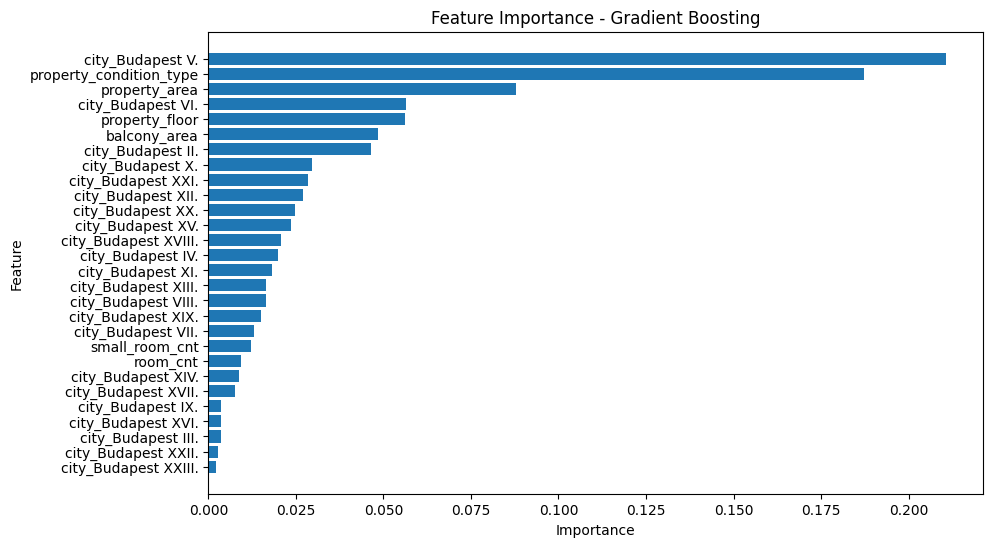

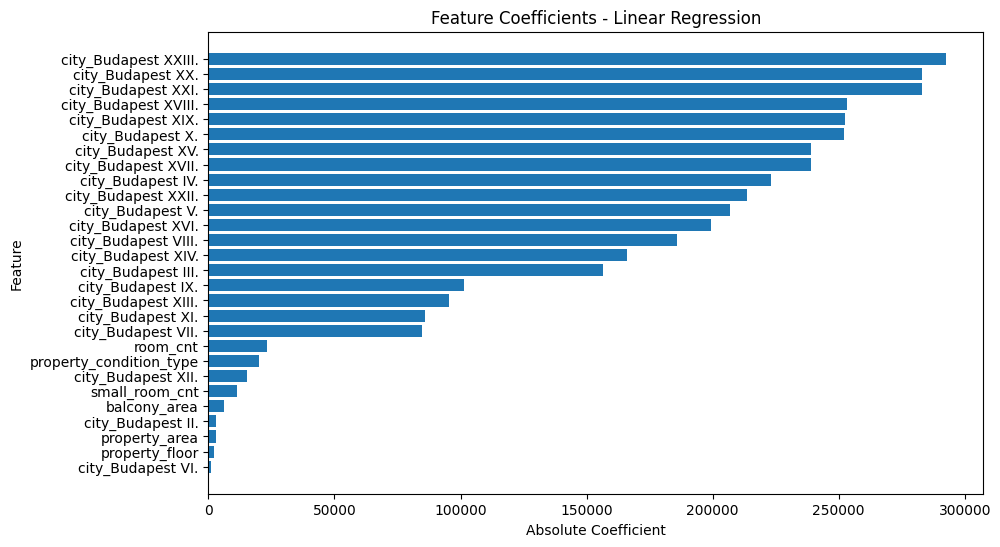

In [79]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

gbm_importance = model2.feature_importances_
gbm_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': gbm_importance
}).sort_values(by='Importance', ascending=False)

linreg_coeff = np.abs(model1.fit(X, y).coef_)
linreg_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': linreg_coeff
}).sort_values(by='Coefficient', ascending=False)


plt.figure(figsize=(10, 6))
plt.barh(gbm_importance_df['Feature'], gbm_importance_df['Importance'])
plt.title('Feature Importance - Gradient Boosting')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.gca().invert_yaxis()
plt.show()

plt.figure(figsize=(10, 6))
plt.barh(linreg_importance_df['Feature'], linreg_importance_df['Coefficient'])
plt.title('Feature Coefficients - Linear Regression')
plt.xlabel('Absolute Coefficient')
plt.ylabel('Feature')
plt.gca().invert_yaxis()
plt.show()


Az első diagram a Gradient Boosting Model által azonosított változók fontosságát mutatja. A modell szerint a "city_Budapest V.", azaz az V. kerület, kiemelkedően fontos tényező az árak meghatározásában. Ez nem meglepő, hiszen Budapest belvárosi kerületeiben az ingatlanárak általában magasabbak. A másik kiemelkedően fontos tényező a „property_condition_type”, vagyis az ingatlan állapota, ami logikus, hiszen egy felújított vagy jó állapotú ingatlan jellemzően többet ér. Szintén jelentős szerepet kap az „property_area”, vagyis az ingatlan mérete, ami az egyik alapvető ármeghatározó tényező. A „property_floor” (melyik emeleten található az ingatlan) és a "balcony_area” (erkély mérete) szintén fontosnak bizonyultak, ami azt jelzi, hogy a kényelmi szempontok is nagy befolyással vannak az árakra. Ezekkel ellentétben pélául a XXII. kerület vagy a "room_cnt", azaz a szobaszám, kevésbé befolyásolják az ingatlanok árainak alakulását.

A második diagram a Lineáris Regresszió által azonosított együtthatókat mutatja. Ebben a modellben a kerületi változók dominálnak. Például a "city_Budapest XXIII.” és a "city_Budapest XX.” kiemelkedően nagy hatással vannak az árakra. Ez azt jelzi, hogy a lineáris modell a lokációra helyezi a legnagyobb hangsúlyt. Érdekes módon itt az ingatlan állapota, a "property_condition_type” kevésbé fontos, mint a Gradient Boosting Modelben, ami arra utalhat, hogy a Lineáris Regresszió kevésbé képes megragadni az állapot hatását. A kisebb kényelmi tényezők, például a "small_room_cnt” (kis szobák száma), itt is megjelennek, de szintén kisebb súlyt kapnak.

Összességében elmondható, hogy a Gradient Boosting Model összetettebb módon kezeli a változók közti kapcsolatokat, míg a Lineáris Regresszió egyszerűbb, de a lokációt kiemelten kezelő megközelítést alkalmaz. Ez alapján a Gradient Boosting Model lehet alkalmasabb a komplex összefüggések feltárására, míg a Lineáris Regresszió egyszerűbb, de jól értelmezhető eredményeket ad. Az eredmények azt mutatják, hogy a kerületek és az ingatlan állapota kiemelten fontos szerepet játszik az árak meghatározásában.

In [82]:
y_pred = model2.predict(X)

lower_bound = y_pred * 0.75
upper_bound = y_pred * 0.95 

underpriced_mask = (y >= lower_bound) & (y <= upper_bound)

underpriced_properties = df[underpriced_mask]
underpriced_properties['Actual Price'] = y[underpriced_mask]
underpriced_properties['Predicted Price'] = y_pred[underpriced_mask]

num_underpriced_properties = underpriced_properties.shape[0]

neptun_code = "EUGN1B" 
output_file = f"results_{neptun_code}.csv"
underpriced_properties.to_csv(output_file, index=False)

print(f"Number of underpriced properties: {num_underpriced_properties}")
print(f"Results saved to: {output_file}")


C:\Users\afodor\AppData\Local\Temp\ipykernel_9840\4184777506.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  underpriced_properties['Actual Price'] = y[underpriced_mask]
C:\Users\afodor\AppData\Local\Temp\ipykernel_9840\4184777506.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  underpriced_properties['Predicted Price'] = y_pred[underpriced_mask]


Number of underpriced properties: 62998
Results saved to: results_EUGN1B.csv
